# World of Quantum Hands-on

# Hello Quantum World!

This example is divided into three parts. First, you'll explore the basics of quantum gates. Then, you'll build and run a simple quantum circuit using Qiskit patterns, which you'll later scale up to a more complex version. Finally, you'll learn about transpilation and its crucial role in optimizing quantum circuits for real hardware. You can also follow along with the Hello World episode of the [Coding with Qiskit 1.0](https://www.youtube.com/watch?v=93-zLTppFZw) video series.



## Before you begin

Follow the [Install and set up](https://docs.quantum.ibm.com/guides/install-qiskit) instructions if you haven't already, including the steps to [Set up to use IBM Quantum™ Platform](https://docs.quantum.ibm.com/guides/setup-channel#set-up-to-use-ibm-quantum-platform).

It is recommended that you use the [Jupyter](https://jupyter.org/install) development environment to interact with quantum computers. Be sure to install the recommended extra visualization support (`'qiskit[visualization]'`). You'll also need the `matplotlib` package for the second part of this example.

To learn about quantum computing in general, visit the [Basics of quantum information course](https://learning.quantum.ibm.com/course/basics-of-quantum-information) in IBM Quantum Learning.




## Imports

In [1]:
# Import necessary modules for this notebook
import matplotlib.pyplot as plt
import numpy as np
import qiskit
import time
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere
from qiskit_aer import AerSimulator
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram
print(qiskit.__version__)

1.2.4


# 1. Quantum Gates and Quantum Circuits
Quantum circuits are models for quantum computation in which a computation is a sequence of quantum gates. Let's take a look at some of the popular quantum gates.

### X Gate
An X gate equates to a rotation around the X-axis of the Bloch sphere by $\pi$ radians.
It maps $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$. It is the quantum equivalent of the NOT gate for classical computers and is sometimes called a bit-flip.

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

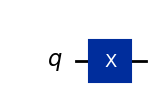

In [2]:
# Let's apply an X-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.x(0)
qc.draw(output='mpl')

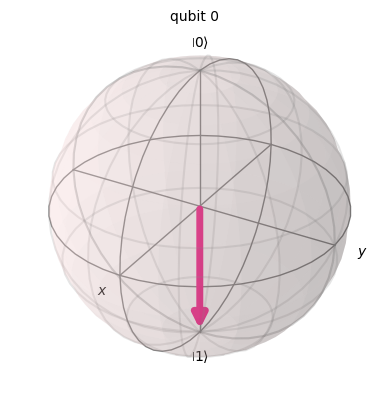

In [3]:
# Let's see Bloch sphere visualization
sv = Statevector(qc)
plot_bloch_multivector(sv)

### H Gate
A Hadamard gate represents a rotation of $\pi$ about the axis that is in the middle of the $X$-axis and $Z$-axis.
It maps the basis state $|0\rangle$ to $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$, which means that a measurement will have equal probabilities of being `1` or `0`, creating a 'superposition' of states. This state is also written as $|+\rangle$.

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

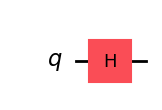

In [4]:
# Let's apply an H-gate on a |0> qubit
qc = QuantumCircuit(1)
qc.h(0)
qc.draw(output='mpl')

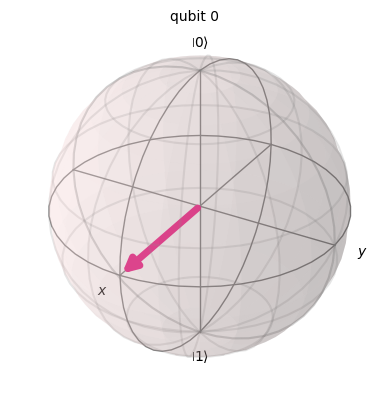

In [5]:
# Let's see Bloch sphere visualization
sv = Statevector(qc)
plot_bloch_multivector(sv)

### CX Gate (CNOT Gate)
The controlled NOT (or CNOT or CX) gate acts on two qubits. It performs the NOT operation (equivalent to applying an X gate) on the second qubit only when the first qubit is $|1\rangle$ and otherwise leaves it unchanged. Note: Qiskit numbers the bits in a string from right to left.

$CX = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$

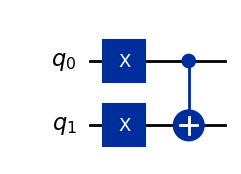

In [6]:
# Let's apply a CX-gate on |11>
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.cx(0,1)
qc.draw(output='mpl')

<div class="alert alert-success">
    
**Exercise 1** Create the first Bell state

$ |\phi^+ \rangle = \frac{1}{\sqrt 2}(|00 \rangle + |11 \rangle) $

Options:

a)
```python
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(1,0)
```
b)
```python
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
```
c) 
```python
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0)
qc.cx(1)
```
d) 
```python
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,2)
```


</div>

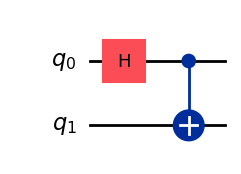

In [7]:
# Create a Bell state circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

# Draw the circuit
qc.draw("mpl")

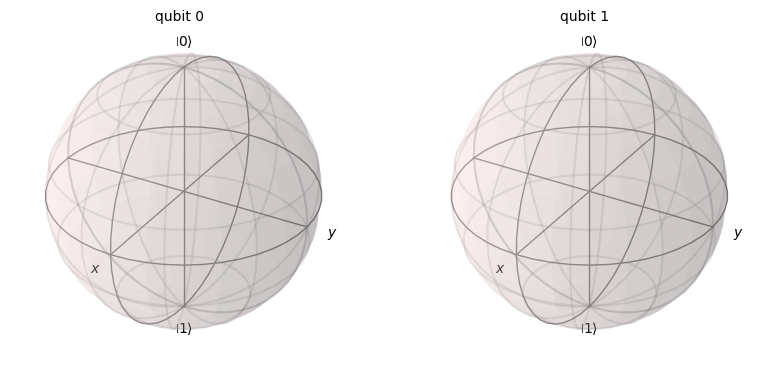

In [8]:
# Get the statevector of the circuit
sv = Statevector(qc)

# Plot the state using Bloch sphere visualization
plot_bloch_multivector(sv)

# You will see that no vector is shown in the Bloch sphere, because the Bell state is entangled.

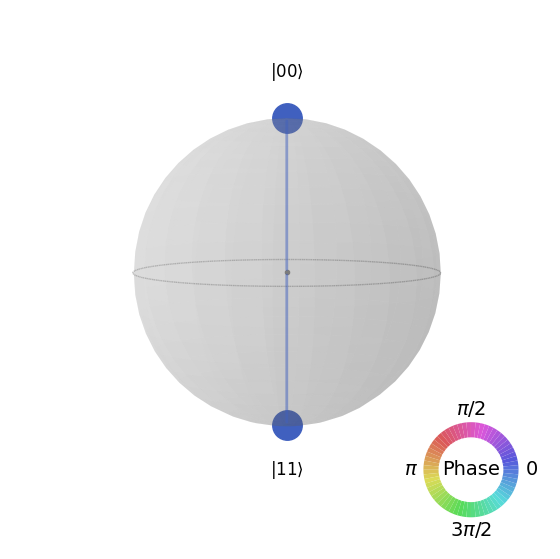

In [9]:
# Plot the state using q-sphere visualization

plot_state_qsphere(sv)
# q-sphere is useful for visualizing states when Bloch sphere fails to

<div class="alert alert-success">

**Exercise 2** Create the second Bell state

$ |\phi^- \rangle = \frac{1}{\sqrt 2}(|00 \rangle - |11 \rangle) $


Options:


a)
```python
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.x(1)
```
b)
```python
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(1,0)
qc.cx(0,1)
```
c) 
```python
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0)
qc.cx(1)
```
d) 
```python
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0,1)
```
</div>


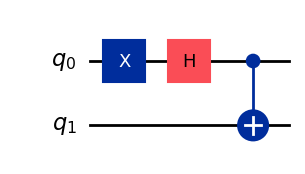

In [10]:
# Create a circuit with the second Bell state
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0,1)

qc.draw("mpl")

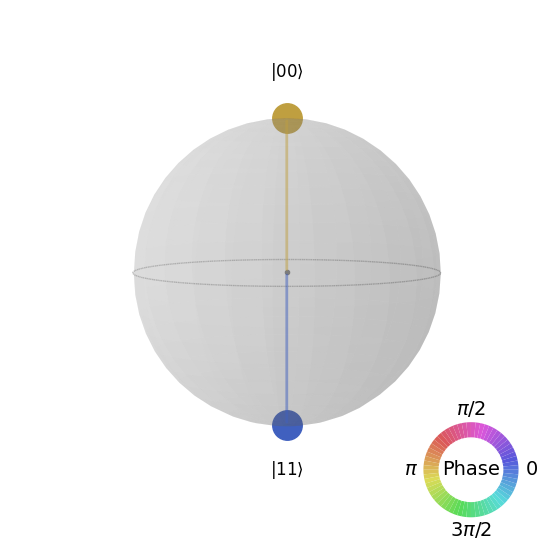

In [11]:
# Get the statevector of the circuit
sv = Statevector(qc)

# Plot the state using qsphere visualization
plot_state_qsphere(sv)

<div class="alert alert-success">

**Exercise 3** Create the 3-qubit GHZ state

$ |GHZ \rangle = \frac{1}{\sqrt 2}(|000 \rangle + |111 \rangle) $


Options:


a)
```python
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0)
qc.cx(1)
qc.cx(2)
```
b)
```python
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1,2)
```
c) 
```python
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
```
d) 
```python
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(1,2)
qc.cx(0,2)
```
</div>

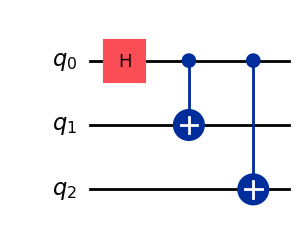

In [12]:
# Create a circuit with 3-qubit GHZ state
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)

qc.draw("mpl")

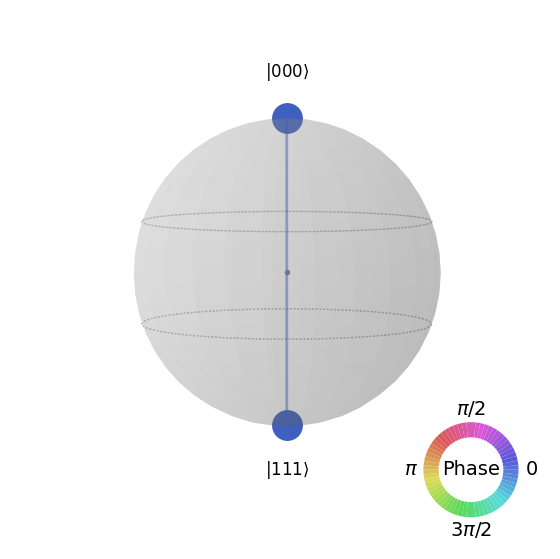

In [13]:
# Get the statevector of the circuit
sv = Statevector(qc)

# Plot the state using qsphere visualization
plot_state_qsphere(sv)

<div class="alert alert-success">

**Exercise 4** Create Qiskit logo state

$ |Qiskit \rangle = \frac{1}{\sqrt 2}(|0010 \rangle + |1101 \rangle) $

Options:


a)
```python
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.x(1)
```
b)
```python
qc = QuantumCircuit(4)
qc.h(0)
qc.x(0)
qc.cx(0,1,2,3)
```
c) 
```python
qc = QuantumCircuit(4)
qc.h(1)
qc.x(1)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)

```
d) 
```python
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
```

</div>



<div align="center">

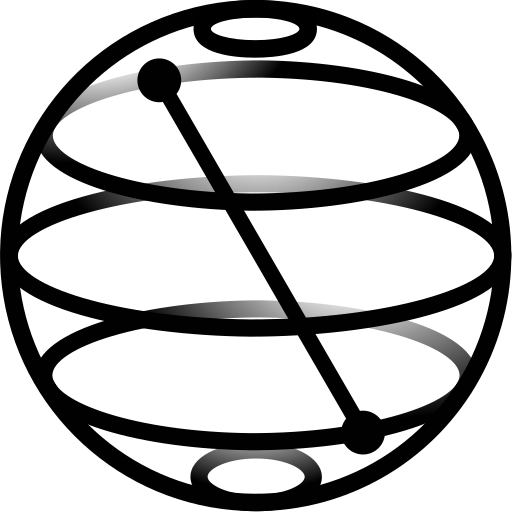

</div>


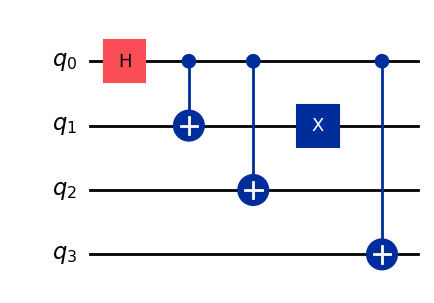

In [14]:
# Create a circuit with the Qiskit logo state
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
qc.x(1)

# Draw the circuit
qc.draw("mpl")

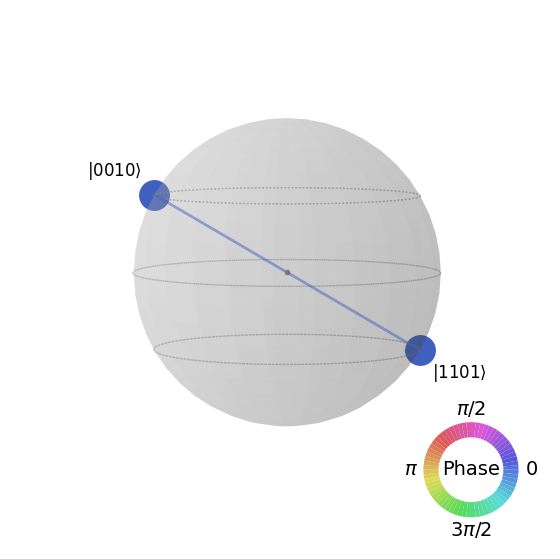

In [15]:
# Get the statevector of the circuit
sv = Statevector(qc)

# Plot the state using qsphere visualization
plot_state_qsphere(sv)

# 2. Create and run a simple quantum program



The four steps to writing a quantum program using Qiskit patterns are:

1.  Map the problem to a quantum-native format.

2.  Optimize the circuits and operators.

3.  Execute using a quantum primitive function.

4.  Analyze the results.

### 2.1 Map the problem to a quantum-native format

In a quantum program, *quantum circuits* are the native format in which to represent quantum instructions, and *operators* represent the observables to be measured. When creating a circuit, you'll usually create a new [`QuantumCircuit`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit-class) object, then add instructions to it in sequence.



The following code cell creates a circuit that produces a *Bell state,* which is a state wherein two qubits are fully entangled with each other.

<div class="alert alert-info">

  The Qiskit SDK uses the LSb 0 bit numbering where the $n^{th}$ digit has value $1 \ll n$ or $2^n$. For more details, see the [Bit-ordering in the Qiskit SDK](https://docs.quantum.ibm.com/guides/bit-ordering) topic.

</div>



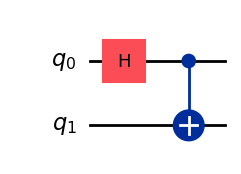

In [16]:
# Create a Bell state circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

# Draw the circuit
qc.draw("mpl")

See [`QuantumCircuit`](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit-class) in the documentation for all available operations.



When creating quantum circuits, you must also consider what type of data you want returned after execution. Qiskit provides two ways to return data: you can obtain a probability distribution for a set of qubits you choose to measure, or you can obtain the expectation value of an observable. Prepare your workload to measure your circuit in one of these two ways with [Qiskit primitives](https://docs.quantum.ibm.com/guides/get-started-with-primitives) (explained in detail in Step 3).

This example measures expectation values by using the `qiskit.quantum_info` submodule, which is specified by using operators (mathematical objects used to represent an action or process that changes a quantum state). The following code cell creates six two-qubit Pauli operators: `IZ`, `IX`, `ZI`, `XI`, `ZZ`, and `XX`.

<div class="alert alert-success">

**Exercise 5** Create a list of all six two-qubit Pauli operators in `observables_labels` as SparsePauliOp objects

Options:

a)
```python
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = SparsePauliOp(observables_labels)
```

b)
```python
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [Pauli(label) for label in observables_labels]
```
c) 
```python
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]
```
d) 
```python
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = SparsePauliOp.from_labels(observables_labels)
```

</div>

In [17]:
# Set up six different observables.
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]
print(observables)


[SparsePauliOp(['IZ'],
              coeffs=[1.+0.j]), SparsePauliOp(['IX'],
              coeffs=[1.+0.j]), SparsePauliOp(['ZI'],
              coeffs=[1.+0.j]), SparsePauliOp(['XI'],
              coeffs=[1.+0.j]), SparsePauliOp(['ZZ'],
              coeffs=[1.+0.j]), SparsePauliOp(['XX'],
              coeffs=[1.+0.j])]


<div class="alert alert-info">

  Here, something like the `ZZ` operator is a shorthand for the tensor product $Z\otimes Z$, which means measuring Z on qubit 1 and Z on qubit 0 together, and obtaining information about the correlation between qubit 1 and qubit 0. Expectation values like this are also typically written as $\langle Z_1 Z_0 \rangle$.

  If the state is entangled, then the measurement of $\langle Z_1 Z_0 \rangle$ should be 1.

</div>



<span id="optimize" />

### 2.2 Optimize the circuits and operators

When executing circuits on a device, it is important to optimize the set of instructions that the circuit contains and minimize the overall depth (roughly the number of instructions) of the circuit. This ensures that you obtain the best results possible by reducing the effects of error and noise. Additionally, the circuit's instructions must conform to a backend device's [Instruction Set Architecture (ISA)](https://docs.quantum.ibm.com/guides/transpile#instruction-set-architecture) and must consider the device's basis gates and qubit connectivity.

The following code instantiates a real device to submit a job to and transforms the circuit and observables to match that backend's ISA.

If you have not previously saved your credentials, follow instructions [here](https://docs.quantum.ibm.com/guides/setup-channel#iqp) to authenticate with your API token.

In [18]:
service = QiskitRuntimeService(
    token='f9ccd8a380c2fcdf68d60bfcec0192943b8c34f1ad9d368047572e04e989be6660fd1d5232bb2ede027c7ae414da3082bfac42c987843693ea61ce6b2c09f3f7',
    channel="ibm_quantum")
backend = service.backend('ibm_brisbane')


If you want to execute this on hardware you should not execute the next line

In [19]:
seed_sim=42
backend=AerSimulator.from_backend(backend,seed_simulator=seed_sim)

/var/folders/vg/tyls0nfx4cx08y07gy1lg0f80000gn/T/ipykernel_39002/2077993870.py:2: DeprecationWarning: The class ``qiskit.providers.models.backendconfiguration.QasmBackendConfiguration`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The models in ``qiskit.providers.models`` are part of the deprecated `BackendV1` workflow and no longer necessary for `BackendV2`. If a user workflow requires these representations it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  backend=AerSimulator.from_backend(backend,seed_simulator=seed_sim)


<div class="alert alert-success">

**Exercise 6** Transpile the circuit into ISA circuit

Options:
a)
```python
pm = generate_preset_pass_manager(backend=backend, optimization_level=2)
isa_circuit = pm.optimize(qc)
```

b)
```python
generate_preset_pass_manager(backend=backend, optimization_level=2)
isa_circuit = pm.run(qc)
```
c) 
```python
pm = generate_preset_pass_manager(qc,optimization_level=2)
isa_circuit = pm.run(backend)
```
d) 
```python
pm = PassManager()
isa_circuit = pm.generate_preset_pass_manager(qc, optimization_level=2)
```

</div>

In [20]:
# Convert to an ISA circuit and layout-mapped observables.
generate_preset_pass_manager(backend=backend, optimization_level=2)
isa_circuit = pm.run(qc)

isa_circuit.draw("mpl", idle_wires=False)

NameError: name 'pm' is not defined

### 2.3 Execute using the quantum primitives

Quantum computers can produce random results, so you usually collect a sample of the outputs by running the circuit many times. You can estimate the value of the observable by using the `Estimator` class. `Estimator` is one of two [primitives](https://docs.quantum.ibm.com/guides/get-started-with-primitives); the other is `Sampler`, which can be used to get data from a quantum computer.  These objects possess a `run()` method that executes the selection of circuits, observables, and parameters (if applicable), using a [primitive unified bloc (PUB).](https://docs.quantum.ibm.com/guides/primitives#sampler)

In [36]:
# Construct the Estimator instance.
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000

mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

<div class="alert alert-success">

**Exercise 7** Submit a job using the Estimator primitive.

Options:

a)
```python
job = estimator.execute(isa_circuit, mapped_observables)
```

b)
```python
job=estimator.run(isa_circuit, mapped_observables)
```

c) 
```python
job = estimator.run([isa_circuit, mapped_observables])
```
d) 
```python
job = estimator.run([(isa_circuit, mapped_observables)])
```
</div>

In [37]:
# One pub, with one circuit to run against six different observables.
job = estimator.run([(isa_circuit, mapped_observables)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: 7617c1ea-d387-4bce-8fe7-a21ca3323cf4


/Users/albertopancaldi/Documents/Python/QISKIT/World_of_Quantum/venv_WoQ/lib/python3.12/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:187: UserWarning: The resilience_level option has no effect in local testing mode.
  warnings.warn("The resilience_level option has no effect in local testing mode.")


After a job is submitted, you can wait until either the job is completed within your current python instance, or use the `job_id` to retrieve the data at a later time.  (See the [section on retrieving jobs](https://docs.quantum.ibm.com/guides/monitor-job#retrieve-job-results-at-a-later-time) for details.)

After the job completes, examine its output through the job's `result()` attribute.



In [38]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()

# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

Now we can also execute the circuit using the `Sampler` primitive

In [39]:
# We include the measurements in the circuit
qc.measure_all()
sampler = Sampler(mode=backend)

<div class="alert alert-success">

**Exercise 8** Submit a job using the Sampler primitive.

Options:

a)
```python
job_sampler = sampler.run(pm.run([qc]))
```

b)
```python
job_sampler = sampler.run(qc)
```

c) 
```python
job_sampler = pm.run(sampler.run([qc]))
```
d) 
```python
job_sampler = sampler.execute([qc])
```

</div>

In [41]:
job_sampler = sampler.run(pm.run([qc]))
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job_sampler.job_id()}")
# Get the results
results_sampler = job_sampler.result()

>>> Job ID: 2cdc8b64-0a70-47ae-9841-1745496b541f


### 2.4 Analyze the results

The analyze step is typically where you might postprocess your results using, for example, measurement error mitigation or zero noise extrapolation (ZNE). You might feed these results into another workflow for further analysis or prepare a plot of the key values and data. In general, this step is specific to your problem.  For this example, plot each of the expectation values that were measured for our circuit.

The expectation values and standard deviations for the observables you specified to Estimator are accessed through the job result's `PubResult.data.evs` and `PubResult.data.stds` attributes. To obtain the results from Sampler, use the `PubResult.data.meas.get_counts()` function, which will return a `dict` of measurements in the form of bitstrings as keys and counts as their corresponding values. For more information, see [Get started with Sampler.](https://docs.quantum.ibm.com/guides/get-started-with-primitives#get-started-with-sampler)



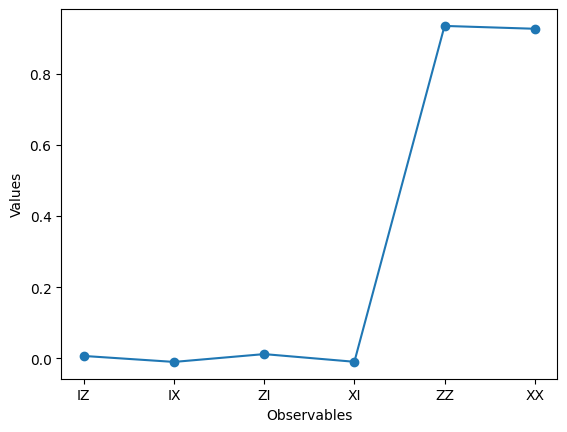

In [42]:
# Plot the result
from matplotlib import pyplot as plt
values = pub_result.data.evs
errors = pub_result.data.stds
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

Notice that for qubits 0 and 1, the independent expectation values of both X and Z are 0, while the correlations (`XX` and `ZZ`) are 1. This is a hallmark of quantum entanglement.



Now we plot the results for the Sampler

{'11': 485, '00': 513, '01': 12, '10': 14}
  Outcomes : {'11': 485, '00': 513, '01': 12, '10': 14}


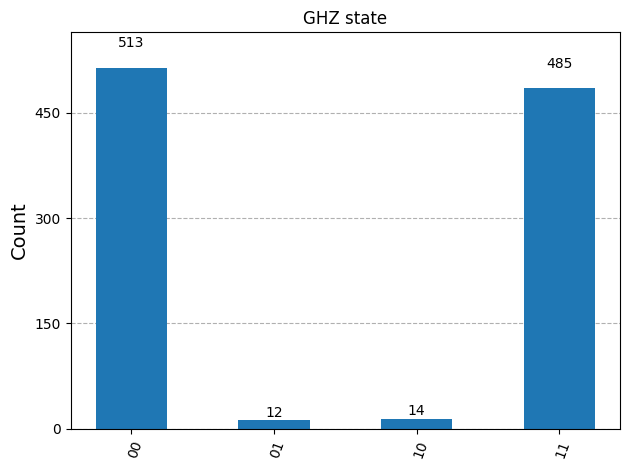

In [43]:
counts_list = results_sampler[0].data.meas.get_counts()
print(counts_list)
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

As one expect, there is a small deviation from the ideal Bell state, since we are using a noisy simulator that reproduced the noise of the backend `ibm_brisbane`

## 2.5 Scale to large numbers of qubits

In quantum computing, utility-scale work is crucial for making progress in the field. Such work requires computations to be done on a much larger scale; working with circuits that might use over 100 qubits and over 1000 gates. This example takes a small step in that direction scaling the GHZ problem to $n=10$ qubits.  It uses the Qiskit patterns workflow and ends by measuring the expectation value $\langle Z_0 Z_i \rangle $ for each qubit.

### Step 1. Map the problem

Write a function that returns a `QuantumCircuit` that prepares an $n$-qubit GHZ state (essentially an extended Bell state), then use that function to prepare a 10-qubit GHZ state and collect the observables to be measured.

<div class="alert alert-success">

**Exercise 9** Create a n-qubit GHZ state circuit


Options:

a)
```python
for i in range(n-1):
    qc.cx(i, i+1)
qc.h(0)
```

b)
```python
qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)
```

c) 
```python
qc.h(0)
for i in range(n):
    qc.cx(i, i+1)
```
d) 
```python
for i in range(n):
    qc.h(i)
    qc.cx(i, i+1)

```


</div>

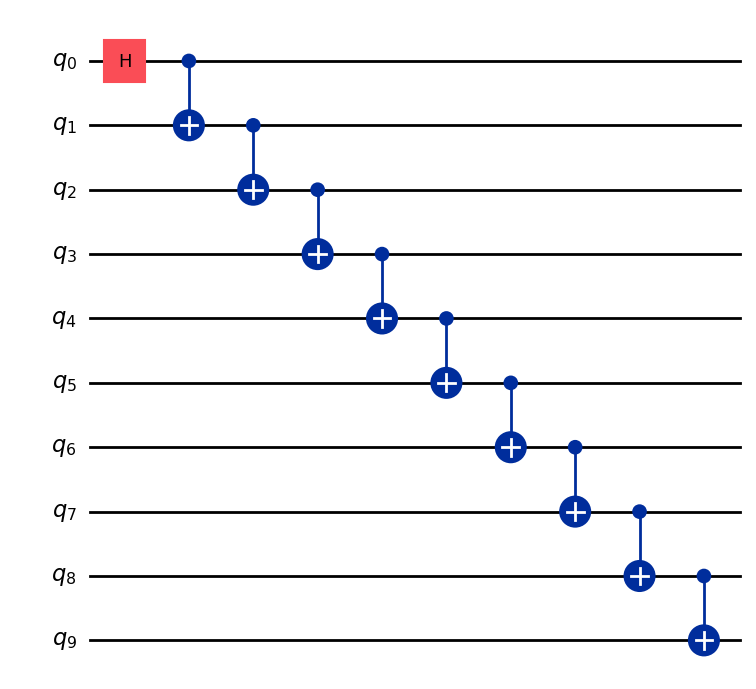

In [56]:
def get_qc_for_n_qubit_GHZ_state(n: int) -> QuantumCircuit:

    qc = QuantumCircuit(n) 
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc


# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
n = 10
qc_n_GHZ = get_qc_for_n_qubit_GHZ_state(n)
qc_n_GHZ.draw("mpl")

Next, map to the operators of interest. This example uses the `ZZ` operators between qubits to examine the behavior as they get farther apart.  Increasingly inaccurate (corrupted) expectation values between distant qubits would reveal the level of noise present.

<div class="alert alert-success">

**Exercise 10** Create a list of `ZZ` operators with increasing distance.

Starting with `ZZII...II`, `ZIZI...II`, `ZIIZ...II`, increasing the distance between the two `Z` operators to the farthest position `ZIII...IZ`.

Options:

a)
```python
operator_strings = [
    "Z" + "I" * i + "Z" + "I" * (n - 2) for i in range(n - 1)
]
```

b)
```python
operator_strings = [
    "Z" + i * "I" + "Z" + i * "I" for i in range(n - 1)
]
```

c) 
```python

operator_strings = [
    "Z" + "Z" + "I" * (n - i - 1) for i in range(n - 1)
]
```
d) 
```python
operator_strings = [
    "Z" + i * "I" + "Z" + "I" * (n - i - 2) for i in range(n - 1)
]

```

</div>

In [57]:
# ZZII...II, ZIZI...II, ... , ZIII...IZ
operator_strings = [
    "Z" + i * "I" + "Z" + "I" * (n - i - 2) for i in range(n - 1)
]

print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator) for operator in operator_strings]

['ZZIIIIIIII', 'ZIZIIIIIII', 'ZIIZIIIIII', 'ZIIIZIIIII', 'ZIIIIZIIII', 'ZIIIIIZIII', 'ZIIIIIIZII', 'ZIIIIIIIZI', 'ZIIIIIIIIZ']
9


### Step 2. Optimize the problem for execution on quantum backend

Transform the circuit and observables to match the backend's ISA.



In [59]:
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=2)
isa_circuit = pm.run(qc_n_GHZ) 
isa_operators_list = [operator.apply_layout(isa_circuit.layout) for operator in operators] 

### Step 3. Execute on backend

Submit the job and if you execute it on hardware enable error suppression by using a technique to reduce errors called [dynamical decoupling.](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/options-dynamical-decoupling-options) The resilience level specifies how much resilience to build against errors. Higher levels generate more accurate results, at the expense of longer processing times.  For further explanation of the options set in the following code, see [Configure error mitigation for Qiskit Runtime.](https://docs.quantum.ibm.com/guides/configure-error-mitigation)



In [60]:
# Submit the circuit to Estimator
job = estimator.run([(isa_circuit, isa_operators_list)])
job_id = job.job_id()

/Users/albertopancaldi/Documents/Python/QISKIT/World_of_Quantum/venv_WoQ/lib/python3.12/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:187: UserWarning: The resilience_level option has no effect in local testing mode.
  warnings.warn("The resilience_level option has no effect in local testing mode.")


### Step 4. Post-process results

To better understand the behavior of entangled quantum states on real hardware, we analyze the pairwise correlations between qubits in the Z basis. Specifically, we look at the expectation values ⟨Z₀Zᵢ⟩, which measure how strongly qubit 0 is correlated with each other qubit i. In particular we are going to plot: 
$$
\langle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle 
$$

<div class="alert alert-success">

**Exercise 11** Which values of $\langle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle $ do you expect to see in the plot?

Options:

a) Decreasing as we increase $i$

b) Constant in 1

c) Small deviations around 1

d) Alternating 1 and 0 for odd and even values of $i$

</div>

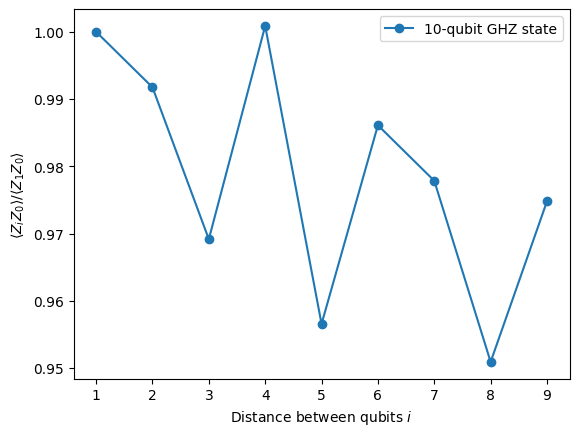

In [61]:
# data
data = list(range(1, len(operators) + 1))  # Distance between the Z operators
result = job.result()[0]
values = result.data.evs  # Expectation value at each Z operator.
values = [
    v / values[0] for v in values
]  # Normalize the expectation values to evaluate how they decay with distance.

# plotting graph
plt.plot(data, values, marker="o", label=f"{n}-qubit GHZ state")
plt.xlabel("Distance between qubits $i$")
plt.ylabel(r"$\langle Z_i Z_0 \rangle / \langle Z_1 Z_0 \rangle $")
plt.legend()
plt.show()

In this plot we notice that $\langle Z_0 Z_i \rangle$ fluctuates around the value 1, even though in an ideal simulation all $\langle Z_0 Z_i \rangle$ should be 1.



<div class="alert alert-success">

**Exercise 12** A more efficient implementation of GHZ state

As you can see, the results of 10 qubit experiments are good but still have some errors. One way to improve the results is to implement GHZ state more efficiently. 

You are probably implementing GHZ state with a staircase-like CNOT gates sequence. You can implement GHZ state more efficiently, reducing the 2-qubit depth from `n` to `n/2` or less.

Options:

a)
```python
for m in range(s, 0, -1):
    qc.cx(m, m - 1)
    if not (n % 2 == 0 and m == s): 
        qc.cx(n - m - 1, n - m)
```

b)
```python

for m in range(s):
    qc.cx(n - m - 1, n - m)
    if not (n % 2 == 0 and m == s):
        qc.cx(m, m - 1)

```

c) 
```python
for m in range(s, 0, -1):
    qc.cx(m, m - 1)
    if (n % 2 == 0 and m == s): 
        qc.cx(n - m - 1, n - m)
```
d) 
```python

for m in range(s, 0, -1):
    if n % 2 == 0 and m == s:
        qc.cx(n - m - 1, n - m)
    qc.cx(m, m - 1)

```

</div>

<div class="alert alert-info">

One important metric to benchmark how accurate the results will be, or how little noise will have for a circuit is 2-qubit gate depth. This is because the error rates for 2-qubit gates (~10 times higher than single qubit gates) dominate the errors of the whole circuit. Use the following code to get 2-qubit gate depth of a circuit.

```python
qc.depth(lambda x: x.operation.num_qubits == 2)
```

</div>

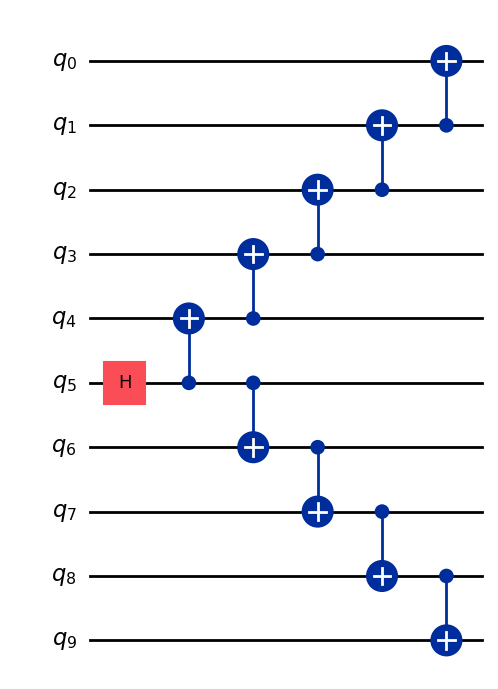

In [62]:
def better_ghz(n):
    "fan out"
    s = int(n / 2)
    qc = QuantumCircuit(n)
    qc.h(s)
    for m in range(s, 0, -1):
        qc.cx(m, m - 1)
        if not (n % 2 == 0 and m == s):
            qc.cx(n - m - 1, n - m)
    return qc


better_ghz(n).draw("mpl")

In [63]:
# Check 2-qubit gate depth before transpilation
qc_better_ghz = better_ghz(n)
qc_better_ghz.depth(lambda x: x.operation.num_qubits == 2)

5

An interesting thing to note here is that we were able to reduce the quantum depth of the circuit we want to execute just by being smart and thinking of a different way to program it. However, there will be situations and algorithms where we can't rely on these clever tricks. This is where the transpiler comes in handy, it helps us optimize all these aspects efficiently, so we don't have to worry too much about them.

# 3. Basic Transpilation with Preset Pass Manager

## 3.1 Why Transpilation?

In quantum computing, a quantum circuit is a sequence of quantum gates applied to qubits to perform a computation. However, the circuit you initially design isn't always optimal for execution on a real quantum computer. This is where **transpilation** comes in.

For more details on the specifics stages of the transpiler, **check out this documentation link on [IBM Quantum Documentation](https://docs.quantum.ibm.com/guides/transpiler-stages).**



## 3.2 Using Preset Pass Managers

Qiskit provides a convenient way to perform transpilation through **preset pass managers** using [`generate_preset_pass_manager`](https://docs.quantum.ibm.com/guides/defaults-and-configuration-options). These are predefined sets of transpilation passes that optimize the circuit to varying degrees depending on the selected **optimization level**:

- **Level 0:** *[No Optimization]* - Basic translation with trivial qubit mapping and no optimizations, primarily for hardware characterization.
- **Level 1:** *[Light Optimization]* - Reduces gate count and simplifies the circuit with minimal compile time, using basic layout and gate optimization.
- **Level 2:** *[Medium Optimization]* - Applies more sophisticated heuristic-based optimizations to further reduce circuit complexity. You can find more specifics in the documentation link [here](https://docs.quantum.ibm.com/guides/set-optimization)
- **Level 3:** *[High Optimization]* - Performs the most extensive optimizations, including advanced gate resynthesis and in-depth layout adjustments.

Each optimization level offers a different balance between the quality of the optimized circuit and the time it takes to transpile. Higher levels generally produce better optimized circuits but require more time to complete.

<div class="alert alert-block alert-info">

💡 **Why Use `generate_preset_passmanager` Instead of `transpile`?**

You may wonder why we recommend `generate_preset_passmanager` over the traditional `transpile` function. <b>Here’s why:</b> While `transpile` offers general optimization, `generate_preset_passmanager` provides greater flexibility and customization specifically tailored to different quantum hardware. With it, you can more precisely control aspects like gate reduction, error suppression, and qubit routing, helping you build circuits optimized for specific backend or execution requirements.
 
We encourage you to explore `generate_preset_passmanager` for a more powerful, flexible and customizable approach to circuit optimization, adding targeted enhancements to your quantum development workflow.
</div>


In this section, you will apply a preset pass manager to the quantum circuit that generates the GHZ. Initially, the circuit will be in its raw form, containing standard quantum gates like Hadamard and CNOT. By applying different levels of optimization, you will observe how the circuit is transformed into a more hardware-efficient version that uses gates supported by the chosen backend, such as RZ, X, SX, and ECR gates.

## 3.3 Customize Transpilation Settings in `generate_preset_pass_manager`

### 3.3.1 Different Layout Methods

<div class="alert alert-success">

**Exercise 13: Layout method comparison**

Transpile a quantum circuit using different layout methods (`trivial`, `sabre`, `dense`, `default`) with a fixed optimization level. Measure and compare transpilation time and circuit depth to identify the most efficient layout strategy.

</div>



In [64]:
times = []
depths = []
# Sweep over layout methods
### WRITE YOUR CODE HERE ###
layout_methods = 
for layout_method in layout_methods:
    pm = 
    ### YOUR CODE FINISHES HERE
    print('\033[1m' + f'Layout method: {layout_method}')
    start = time.time()
    isa_qc = pm.run(qc_n_GHZ)
    dt = time.time() - start
    times.append(dt)
    depth = isa_qc.depth()
    depths.append(depth)

    print('Transpilation time (sec.):', dt)
    print('Circuit depth:', depth)
    print('---' * 50)

# Identify the layout method with the smallest depth
min_depth_index = depths.index(min(depths))
best_layout = layout_methods[min_depth_index]
min_depth = depths[min_depth_index]

print(f"\nBest layout method: {best_layout} with smallest circuit depth of {min_depth}.")

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(layout_methods, times, color='skyblue')
plt.title('Transpilation Time')
plt.xlabel('Layout Method')
plt.ylabel('Time (sec.)')

plt.subplot(1, 2, 2)
plt.bar(layout_methods, depths, color='salmon')
plt.title('Circuit Depth')
plt.xlabel('Layout Method')
plt.ylabel('Depth')

plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (3750220944.py, line 5)

### 3.3.2 Different optimization levels


<div class="alert alert-success">

**Exercise 14: Optimization level comparison**

Transpile a quantum circuit using different optimization levels (0, 1, 2, 3) with a fixed layout_method. Measure and compare transpilation time and circuit depth to identify the most efficient optimization level.
</div>

Optimization level: 0
Transpilation time (sec.): 0.006156206130981445
Circuit depth: 53
------------------------------------------------------------------------------------------------------------------------------------------------------
Optimization level: 1
Transpilation time (sec.): 0.00705409049987793
Circuit depth: 26
------------------------------------------------------------------------------------------------------------------------------------------------------
Optimization level: 2
Transpilation time (sec.): 0.007241964340209961
Circuit depth: 30
------------------------------------------------------------------------------------------------------------------------------------------------------
Optimization level: 3
Transpilation time (sec.): 0.009598970413208008
Circuit depth: 26
------------------------------------------------------------------------------------------------------------------------------------------------------


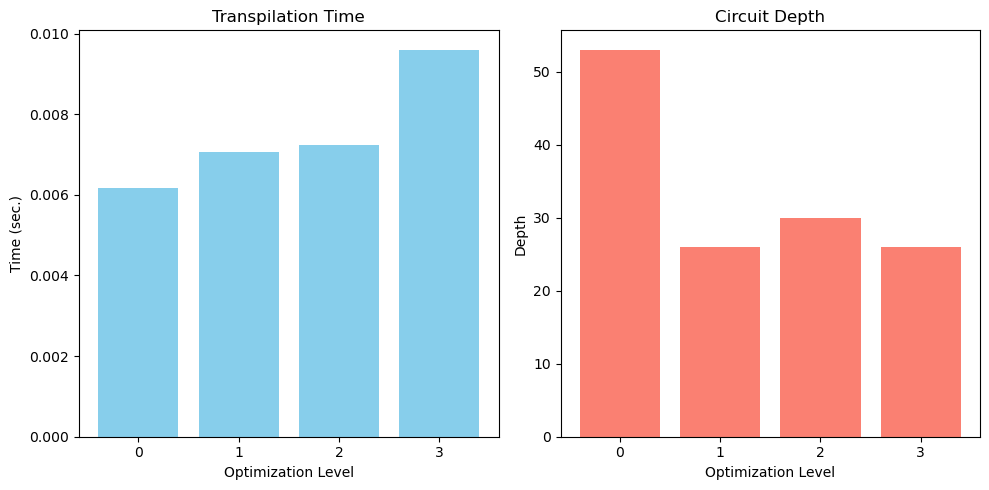

In [ ]:
times = []
depths = []
### WRITE YOUR CODE HERE ###
# Sweep over different optimization levels
optimization_levels = 
for level in optimization_levels:
    pm = 
    ### YOUR CODE FINISHES HERE ###
    print('\033[1m' + f'Optimization level: {level}')
    start = time.time()
    isa_qc = pm.run(qc_n_GHZ)
    dt = time.time() - start
    times.append(dt)
    depth = isa_qc.depth()
    depths.append(depth)

    print('Transpilation time (sec.):', dt)
    print('Circuit depth:', depth)
    print('---' * 50)

# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar([str(lvl) for lvl in optimization_levels], times, color='skyblue')
plt.title('Transpilation Time')
plt.xlabel('Optimization Level')
plt.ylabel('Time (sec.)')

plt.subplot(1, 2, 2)
plt.bar([str(lvl) for lvl in optimization_levels], depths, color='salmon')
plt.title('Circuit Depth')
plt.xlabel('Optimization Level')
plt.ylabel('Depth')

plt.tight_layout()
plt.show()


### 3.3.3 Different seed values

<div class="alert alert-success">

**Exercise 15: Seed values comparison**

Transpile a quantum circuit using different transpiler seeds from 0 to 100 with fixed layout_method and optimization level. Measure and compare transpilation time and circuit depth to identify the most efficient seed.
</div>

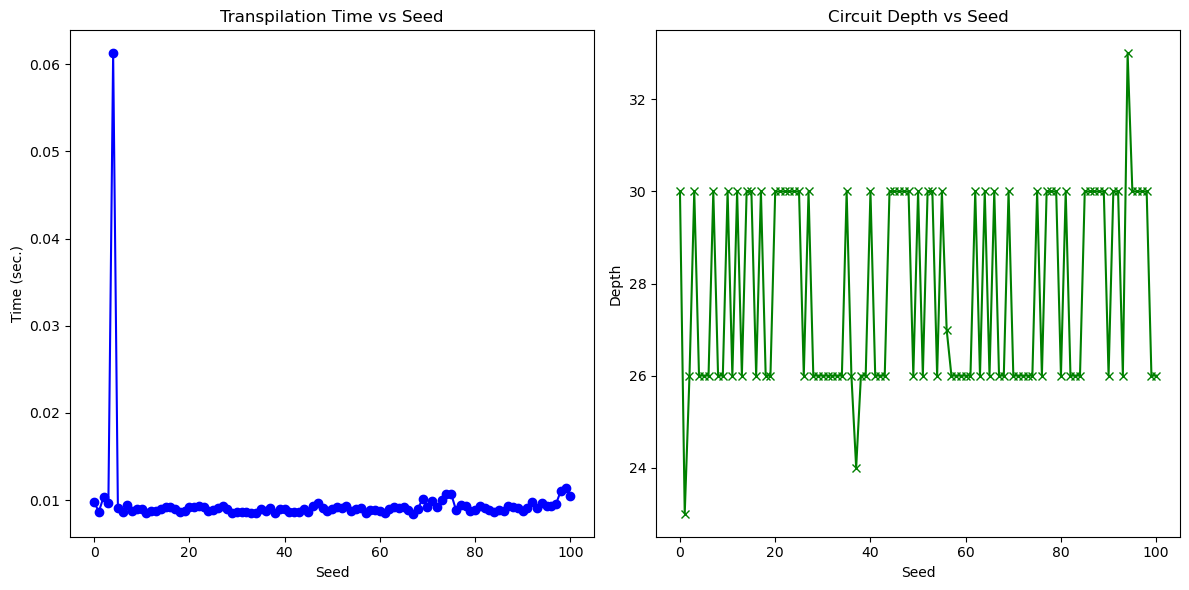

In [ ]:
times = []
depths = []
### WRITE YOUR CODE HERE ###
# Sweep over seed_transpiler values
seed_values = 
for seed in seed_values:
    pm = 
    ### YOUR CODE FINISHES HERE
    start = time.time()
    isa_qc = pm.run(qc_n_GHZ)
    dt = time.time() - start
    times.append(dt)
    depths.append(isa_qc.depth())

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(seed_values, times, marker='o', linestyle='-', color='blue')
plt.title('Transpilation Time vs Seed')
plt.xlabel('Seed')
plt.ylabel('Time (sec.)')

plt.subplot(1, 2, 2)
plt.plot(seed_values, depths, marker='x', linestyle='-', color='green')
plt.title('Circuit Depth vs Seed')
plt.xlabel('Seed')
plt.ylabel('Depth')

plt.tight_layout()
plt.show()


In [38]:
# Find the seed with the smallest depth
min_depth_index = depths.index(min(depths))
best_seed = seed_values[min_depth_index]
min_depth = depths[min_depth_index]

print(f"The best seed is {best_seed} with the smallest circuit depth of {min_depth}.")


The best seed is 1 with the smallest circuit depth of 23.
